In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

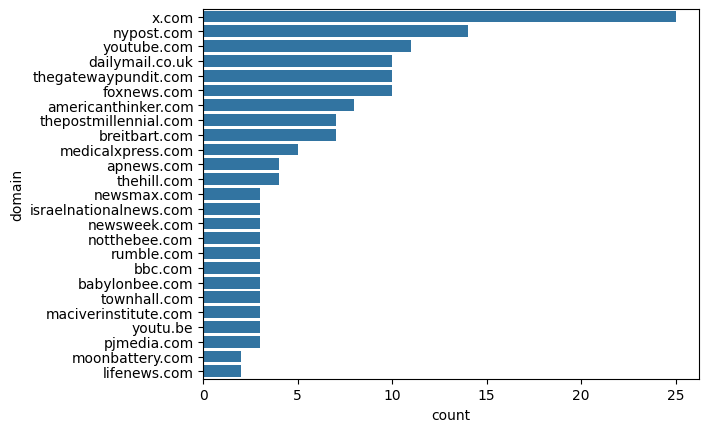

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

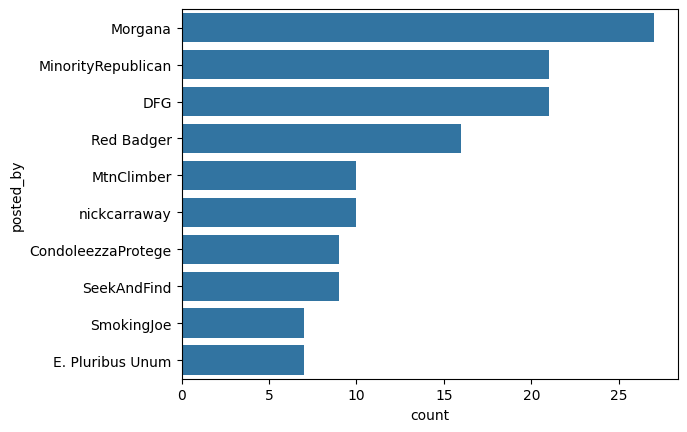

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_100917/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain                                \
                                          count unique                    top   
domain                posted_by                                                 
americanthinker.com   MtnClimber              3      1    americanthinker.com   
                      SeekAndFind             4      1    americanthinker.com   
apnews.com            E. Pluribus Unum        1      1             apnews.com   
                      MinorityRepublican      1      1             apnews.com   
babylonbee.com        DFG                     1      1         babylonbee.com   
bbc.com               MinorityRepublican      1      1                bbc.com   
breitbart.com         DFG                     2      1          breitbart.com   
                      Morgana                 1      1          breitbart.com   
                      Red Badger              1      1          breitbart.com   
dailymail.co.uk       MinorityRepublican      2      1        dailymail.co.uk   
                      DFG                     1      1        dailymail.co.uk   
                      Morgana                 4      1        dailymail.co.uk   
foxnews.com           MinorityRepublican      5      1            foxnews.com   
                      CondoleezzaProtege      1      1            foxnews.com   
lifenews.com          Morgana                 2      1           lifenews.com   
moonbattery.com       Morgana                 2      1        moonbattery.com   
newsmax.com           MinorityRepublican      1      1            newsmax.com   
newsweek.com          SeekAndFind             1      1           newsweek.com   
notthebee.com         Red Badger              3      1          notthebee.com   
nypost.com            MinorityRepublican      1      1             nypost.com   
                      DFG                     5      1             nypost.com   
                      Red Badger              1      1             nypost.com   
                      nickcarraway            2      1             nypost.com   
thegatewaypundit.com  Morgana                 5      1   thegatewaypundit.com   
                      Red Badger              3      1   thegatewaypundit.com   
thehill.com           MinorityRepublican      2      1            thehill.com   
                      DFG                     1      1            thehill.com   
                      CondoleezzaProtege      1      1            thehill.com   
thepostmillennial.com DFG                     1      1  thepostmillennial.com   
                      Morgana                 4      1  thepostmillennial.com   
townhall.com          SeekAndFind             2      1           townhall.com   
                      MinorityRepublican      1      1           townhall.com   
x.com                 E. Pluribus Unum        3      1                  x.com   
                      DFG                     4      1                  x.com   
                      Red Badger              2      1                  x.com   
                      SmokingJoe              6      1                  x.com   
youtube.com           Morgana                 2      1            youtube.com   
                      SmokingJoe              1      1            youtube.com   

                                               
                                         freq  
domain                posted_by                
americanthinker.com   MtnClimber            3  
                      SeekAndFind           4  
apnews.com            E. Pluribus Unum      1  
                      MinorityRepublican    1  
babylonbee.com        DFG                   1  
bbc.com               MinorityRepublican    1  
breitbart.com         DFG                   2  
                      Morgana               1  
                      Red Badger            1  
dailymail.co.uk       MinorityRepublican    2  
                      DFG                   1  
                      Morgana               4  

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_100917/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
